# Analysis of Calgary Business License Data

Dataset provided by: The City of Calgary

In [183]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import geopandas as gpd
sns.set(style='white',context='notebook',palette='viridis')
%matplotlib inline

In [5]:
# Import data.
df = pd.read_csv('dat/Calgary_Business_Licences.csv')
df.head()

,TRADENAME,ADDRESS,LICENCETYPES,COMDISTNM,JOBSTATUSDESC,JOBCREATED,longitude,latitude,location,Count
0,MORE CONVENIENCE STORE,11201 30 ST SW,RETAIL DEALER - PREMISES,CEDARBRAE,RENEWAL LICENSED,2009/06/11,-114.130062,50.953449,"(50.9534492575157, -114.130062103058)",1
1,CUBEX,9304 HORTON RD SW,WHOLESALER,HAYSBORO,RENEWAL LICENSED,2014/01/07,-114.075268,50.971295,"(50.9712947174267, -114.075267980215)",1
2,RESTAURANT AT LOUGHEED HOUSE (THE),707 13 AV SW,ALCOHOL BEVERAGE SALES (RESTAURANT),BELTLINE,RENEWAL LICENSED,2009/10/16,-114.077150,51.040573,"(51.0405732559672, -114.077149598877)",1
3,WESTECK WINDOWS AND DOORS,#4 2015 32 AV NE,RETAIL DEALER - PREMISES,SOUTH AIRWAYS,RENEWAL LICENSED,2015/12/07,-114.010275,51.080509,"(51.0805090794563, -114.010274803475)",1
4,ARBOUR LAKE LIQUOR,37 CROWFOOT RI NW,LIQUOR STORE,ARBOUR LAKE,RENEWAL LICENSED,2014/12/10,-114.211064,51.125870,"(51.1258701250349, -114.211064199092)",1


In [7]:
# Describe the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30660 entries, 0 to 30659
Data columns (total 10 columns):
TRADENAME        30660 non-null object
ADDRESS          30660 non-null object
LICENCETYPES     30660 non-null object
COMDISTNM        30660 non-null object
JOBSTATUSDESC    30660 non-null object
JOBCREATED       30660 non-null object
longitude        30660 non-null float64
latitude         30660 non-null float64
location         30660 non-null object
Count            30660 non-null int64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.3+ MB


Unique values for categorical columns:

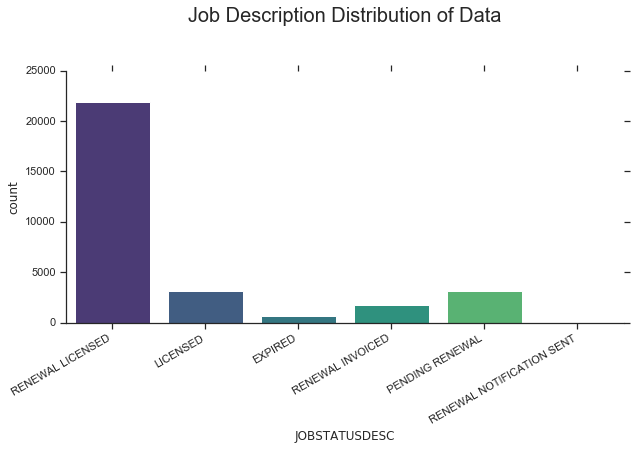

In [224]:
fig,ax=plt.subplots(figsize=[10,5])
sns.countplot(df['JOBSTATUSDESC'],ax=ax)
ax.set_title('Job Description Distribution of Data\n\n',fontsize=20)
sns.despine(ax=ax)
plt.gcf().autofmt_xdate()

## Geographical Distribution of License Transactions

We'd like to show the distribution of the license transactions in the data using a map of Calgary. In the Calgary_Community_Boundaries.ipynb notebook of the project we import and shortly explore the shapefile of Calgary. Here we import it, compute the number of licenses in each of the communities/Polygons in the map and display.

Number of communities in MAP but NOT in LICENCE data are: 71


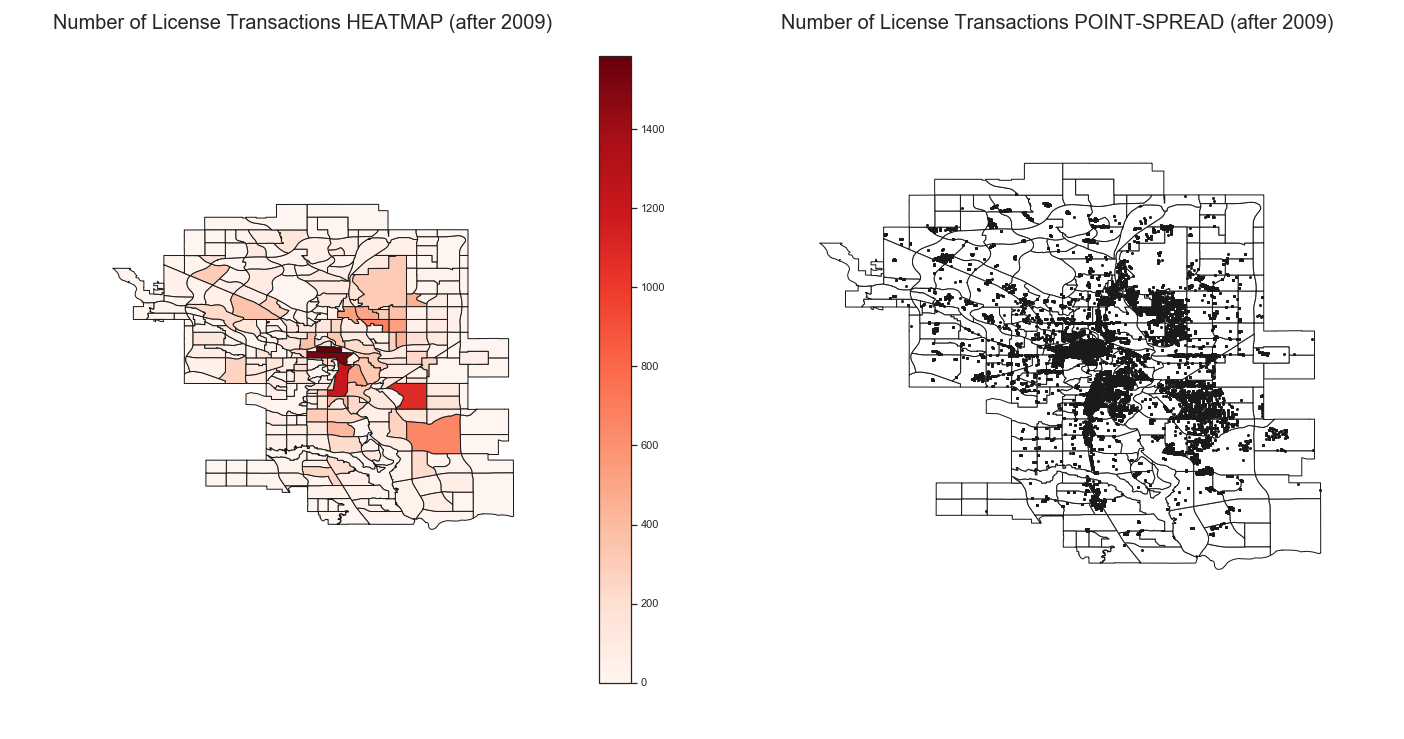

In [222]:
# Import map.
import geopandas as gpd
map_df = gpd.read_file('dat/Calgary_Community_Boundaries/geo_export_98191e70-c41b-4550-8551-d9977b2f1bde.shp')

# The number of times each community name appears in the license data is the number of transactions in each comm.
df['COMDISTNM'].value_counts()
ns = []
# Communities that have no license data (for whatever reason)
not_in_lic = []

for i,line in map_df.iterrows():
    community = line['name']
    # Number of times it appears in license data.
    try:
        n = df['COMDISTNM'].value_counts()[community]
    except KeyError: # when there's a named community not shown in the license data.
        not_in_lic.append(community)
        n = 0
        pass
    ns.append(n)

# Create column.
map_df['N_transactions'] = ns
print('Number of communities in MAP but NOT in LICENCE data are: {}'.format(len(not_in_lic)))

# Figure and axes.
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=[20,10],sharex=True)

# Left plot: heatmap of number of transactions.
map_df.plot(ax=axes[0],column='N_transactions',cmap='Reds',edgecolor='0.1',legend=True)
axes[0].set_title('Number of License Transactions HEATMAP (after 2009)\n',fontsize=20)

# Right plot: point distribution of license transactions (plot map, then the points).
map_df.plot(ax=axes[1],color='white',edgecolor='0.1')
plt.scatter(df['longitude'],df['latitude'],s=4,c='k',edgecolor='k')
axes[1].set_title('Number of License Transactions POINT-SPREAD (after 2009)\n',fontsize=20)

# Rescale and turn off axes.
for ax in axes:
    ax.set(ylim=[50.75,51.3])
    ax.axis('off')

## Clean layout.
plt.tight_layout()
plt.subplots_adjust()

# Save fig.
savestring = 'transactions_heatmap.png'
plt.savefig('figs/' + savestring)

## Timeline of Business License Data

The JOBCREATED variable is the date (yyyy/mm/dd) of the datapoint. 

On that date, one of the following transactions occurred:

- RENEWAL LICENSED
- LICENSED
- PENDING RENEWAL
- RENEWAL INVOICED
- EXPIRED
- RENEWAL NOTIFICATION SENT

These are different transactions and should be analyzed accordingly. 

Let's start with a full timeline of licensed businesses (those for the first time), and stratify by COMMDISTNM (community name).

Convert dates to datetime objects.

In [177]:
import datetime
year, month, day = [int(x[:4]) for x in df['JOBCREATED']], [int(x[5:7]) for x in df['JOBCREATED']] ,[int(x[8:10]) for x in df['JOBCREATED']] 
dates = []

for i in range(len(year)):
    dt = pd.datetime(year=year[i],month=month[i],day=day[i])
    dates.append(dt)

# Assign a date column.
df['Date'] = dates

Let's plot the timeline of each individual community. 

In [ ]:
dfByComm = df.groupby('')